# CSC 732 Pattern Recognition and Neural Networks
Instructor: Dr. Natacha Gueorguieva

Contributors:

Robert Kigobe,
Aayushi Chirag Thakkar,
Nikitha Pulluri

Date: 09-september-2021

QN: Part 2

# Load Libraries

In [1]:
from pandas import read_csv
from pandas import set_option

## Load Data

In [2]:
#Import the dataset
dataset = read_csv ('seeds_dataset.csv', header=None) 
#Setup the column names

names= ['area','perimeter','compactness', 'kernel length',   'kernel width',  'asymmetry coefficient', 'kernel groove Length']
dataset.columns = names
dataset

,area,perimeter,compactness,kernel length,kernel width,asymmetry coefficient,kernel groove Length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


In [3]:
dataset.describe()

,area,perimeter,compactness,kernel length,kernel width,asymmetry coefficient,kernel groove Length
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


# Pairwise Pearson correlations

## Method

In [4]:
set_option('display.width', 100)
set_option('precision', 3)
correlations = dataset.corr(method='pearson')
print(correlations)

                        area  perimeter  compactness  kernel length  kernel width  \
area                   1.000      0.994        0.608          0.950         0.971   
perimeter              0.994      1.000        0.529          0.972         0.945   
compactness            0.608      0.529        1.000          0.368         0.762   
kernel length          0.950      0.972        0.368          1.000         0.860   
kernel width           0.971      0.945        0.762          0.860         1.000   
asymmetry coefficient -0.230     -0.217       -0.331         -0.172        -0.258   
kernel groove Length   0.864      0.891        0.227          0.933         0.749   

                       asymmetry coefficient  kernel groove Length  
area                                  -0.230                 0.864  
perimeter                             -0.217                 0.891  
compactness                           -0.331                 0.227  
kernel length                         -0.17

## Analysis

Pearson correlation refers to the extent to which values are inter dependent. these values range between 1.0 and -1.0. 
,0.9 to 1 positive or negative indicates a very strong correlation.
,0.7 to 0.9 positive or negative indicates a strong correlation.
,0.5 to 0.7 positive or negative indicates a moderate correlation.
,0.3 to 0.5 positive or negative indicates a weak correlation.
,0 to 0.3 positive or negative indicates a negligible correlation.

in our dataset, it can be that asymmetry coefficient has a very weak correlation with all the other variables while prerimeter, kernel length and kernel width have very strong correlations with all the other variables.

# Skew for each attribute

## method

In [5]:
skew = dataset.skew()
print("Skew:")
print(skew)

Skew:
area                     0.400
perimeter                0.387
compactness             -0.538
kernel length            0.525
kernel width             0.134
asymmetry coefficient    0.402
kernel groove Length     0.562
dtype: float64


## Analysis

Skewness is a measure of asymmetry of a distribution. In a normal distribution, the mean divides the curve symmetrically into two equal parts at the median and the value of skewness is zero.
When a distribution is asymmetrical the tail of the distribution is skewed to one side-to the right or to the left.
When the value of the skewness is negative, the tail of the distribution is longer towards the left hand side of the curve.
When the value of the skewness is positive, the tail of the distribution is longer towards the right hand side of the curve.

A skewness value of 0 in the output denotes a symmetrical distribution of values in the row.
A negative skewness value in the output indicates an asymmetry in the distribution corresponding to the row and the tail is larger towards the left hand side of the distribution.
A positive skewness value in the output indicates an asymmetry in the distribution corresponding to the row and the tail is larger towards the right hand side of the distribution.

in our dataset, it can be interpreted that compactness is skewed to the left while the other parametwers are skewed to the right.

# Univariate Density Plot

## Method

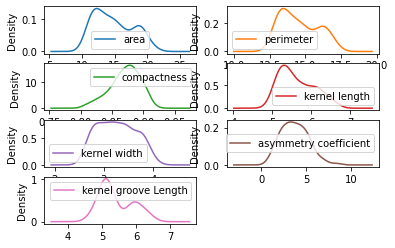

In [6]:
# useful libraries
from matplotlib import pyplot
dataset.plot(kind='density', subplots=True, layout=(4,2), sharex=False)
pyplot.show()

## Analysis

A density plot is a smoothed, continuous version of a histogram estimated from the data. A continuous curve is drawn at every individual data point and all of these curves are then added together to make a single smooth density estimation. Above is the density plots for all the points of the various attributes in the dataset.

# Correlation Matrix Plot

In [7]:
#useful libraries
import numpy

## Method

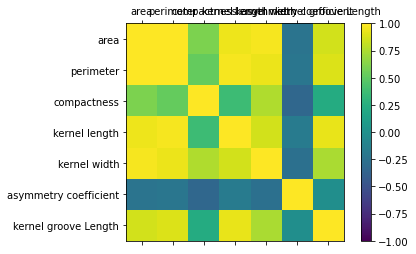

In [8]:
correlations = dataset.corr()

# plot correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,7,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)

pyplot.show()



## Interpretation

from the heatmap above, it can be seen that the asymetric coefficient is the most uncorrelated attribute to the rest followed by the compactness, hence the skew values seen earlier. the rest of the values are closely correlated.

# Rescaling Data

## Method

In [9]:
#useful libraries
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

# separate array into input and output components
#Import the dataset
dataset = read_csv ('seeds_dataset.csv', header=None) 
array_rescale = dataset.values
X = array_rescale[:,0:6]
Y = array_rescale[:,6]

scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)

# summarize transformed data
set_printoptions(precision=3)
print(rescaledX[0:7,:])

[[0.441 0.502 0.571 0.486 0.486 0.189]
 [0.405 0.446 0.662 0.369 0.501 0.033]
 [0.349 0.347 0.879 0.221 0.504 0.251]
 [0.307 0.316 0.793 0.239 0.534 0.194]
 [0.524 0.533 0.865 0.427 0.664 0.077]
 [0.358 0.372 0.789 0.274 0.486 0.221]
 [0.387 0.43  0.652 0.374 0.448 0.367]]


## Interpretation

Rescaling a vector means to add or subtract a constant and then multiply or divide by a constant and in this case to ensure al the data lies between o and 1. A print of the first 7 rows is as above

# Standardize Data

## method

In [10]:
# import useful libraries: Standardize data (0 mean, 1 stdev)

from sklearn.preprocessing import StandardScaler
from pandas import read_csv
from numpy import set_printoptions

# separate array into input and output components
#Import the dataset
dataset = read_csv ('seeds_dataset.csv', header=None) 
array_standadize = dataset.values
X = array_standadize[:,0:6]
Y = array_standadize[:,6]

scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

# summarize transformed data
set_printoptions(precision=3)
print(rescaledX[0:7,:])

[[ 1.421e-01  2.155e-01  6.060e-05  3.042e-01  1.417e-01 -9.862e-01]
 [ 1.119e-02  8.224e-03  4.285e-01 -1.686e-01  1.974e-01 -1.788e+00]
 [-1.921e-01 -3.602e-01  1.442e+00 -7.636e-01  2.080e-01 -6.675e-01]
 [-3.471e-01 -4.753e-01  1.039e+00 -6.890e-01  3.195e-01 -9.608e-01]
 [ 4.453e-01  3.306e-01  1.375e+00  6.667e-02  8.052e-01 -1.563e+00]
 [-1.611e-01 -2.681e-01  1.022e+00 -5.487e-01  1.417e-01 -8.255e-01]
 [-5.427e-02 -5.318e-02  3.776e-01 -1.483e-01  1.049e-03 -7.614e-02]]


## Analysis

Standardizing a vector means subtracting a measure of location and dividing by a measure of scale. For example, if the vector contains random values with a Gaussian distribution, you might subtract the mean and divide by the standard deviation, thereby obtaining a “standard normal” random variable with mean 0 and standard deviation 1. 


# Normalize Data,

## method

In [11]:
# Normalize data (length of 1)
from sklearn.preprocessing import Normalizer
from pandas import read_csv
from numpy import set_printoptions

# separate array into input and output components
#Import the dataset
dataset = read_csv ('seeds_dataset.csv', header=None) 
array_normalize = dataset.values
X = array_normalize[:,0:6]
Y = array_normalize[:,6]

scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(normalizedX[0:7,:])

[[0.68  0.662 0.039 0.257 0.148 0.099]
 [0.681 0.667 0.04  0.254 0.153 0.047]
 [0.674 0.664 0.043 0.249 0.157 0.127]
 [0.666 0.671 0.043 0.256 0.163 0.109]
 [0.699 0.65  0.039 0.245 0.154 0.059]
 [0.674 0.666 0.042 0.252 0.155 0.115]
 [0.67  0.661 0.04  0.254 0.149 0.164]]


## Interpretation

Normalizing a vector most often means dividing by a norm of the vector. It also often refers to rescaling by the minimum and range of the vector, to make all the elements lie between 0 and 1 thus bringing all the values of numeric columns in the dataset to a common scale.

# Binarization

## method

In [12]:
# binarization
from sklearn.preprocessing import Binarizer
from pandas import read_csv
from numpy import set_printoptions

# separate array into input and output components
#Import the dataset
dataset = read_csv ('seeds_dataset.csv', header=None) 
array_binarizer = dataset.values
X = array_binarizer[:,0:6]
Y = array_binarizer[:,6]

binarizer = Binarizer(threshold=0.0).fit(X)
binaryX = binarizer.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(binaryX[0:7,:])

[[1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]]


## analysis

Binarize data (set feature values to 0 or 1) according to a threshold. In our dataset, this all sets the values to 1